In [1]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv(r"weatherHistory.csv")


df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])   
df = df.sort_values(by=['Formatted Date'], ascending=True)
df = df[df['Visibility (km)']>=0]
df = df[df['Humidity']>=0]
df = df[df['Pressure (millibars)']>900]  
df = df[df['Temperature (C)']>-50] 
df = df[df['Loud Cover']==0]  
df = df[df['Wind Bearing (degrees)']<=360]      

df.to_csv('filtered_weatherHistory.csv',index=False)

C:\Users\lashe\AppData\Local\Temp\ipykernel_7928\1004587718.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


model

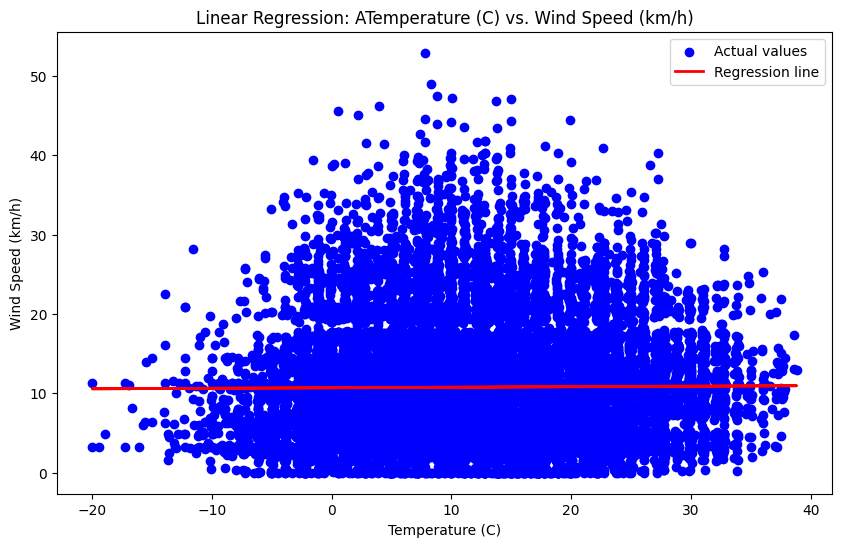

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'filtered_weatherHistory.csv'
df = pd.read_csv(file_path)

# Use 'area' as the single feature for this example
X = df[['Temperature (C)']]  # Feature
y = df['Wind Speed (km/h)']   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.title('Linear Regression: ATemperature (C) vs. Wind Speed (km/h)')
plt.legend()
plt.show()
